 ### Neural Networks From Scratch
 A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.
 
 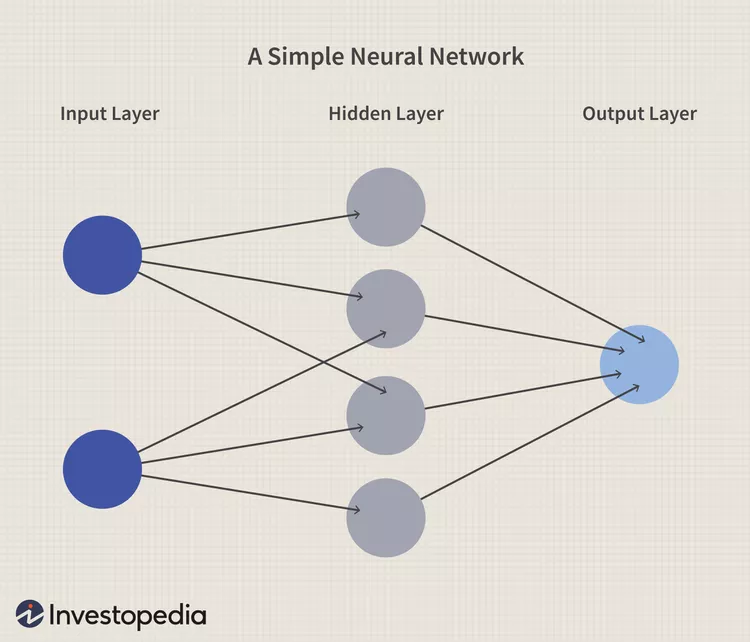

### Types of Neural Networks
#### Feed-Forward Neural Networks
Feed-forward neural networks are one of the more simple types of neural networks. It conveys information in one direction through input nodes; this information continues to be processed in this single direction until it reaches the output mode. Feed-forward neural networks may have hidden layers for functionality, and this type of most often used for facial recognition technologies.

#### Recurrent Neural Networks
A more complex type of neural network, recurrent neural networks take the output of a processing node and transmit the information back into the network. This results in theoretical "learning" and improvement of the network. Each node stores historical processes, and these historical processes are reused in the future during processing.

This becomes especially critical for networks in which the prediction is incorrect; the system will attempt to learn why the correct outcome occurred and adjust accordingly. This type of neural network is often used in text-to-speech applications.

#### Convolutional Neural Networks
Convolutional neural networks, also called ConvNets or CNNs, have several layers in which data is sorted into categories. These networks have an input layer, an output layer, and a hidden multitude of convolutional layers in between. The layers create feature maps that record areas of an image that are broken down further until they generate valuable outputs. These layers can be pooled or entirely connected, and these networks are especially beneficial for image recognition applications.

#### Deconvolutional Neural Networks
Deconvolutional neural networks simply work in reverse of convolutional neural networks. The application of the network is to detect items that might have been recognized as important under a convolutional neural network. These items would likely have been discarded during the convolutional neural network execution process. This type of neural network is also widely used for image analysis or processing.

#### Modular Neural Networks
Modular neural networks contain several networks that work independently from one another. These networks do not interact with each other during an analysis process. Instead, these processes are done to allow complex, elaborate computing processes to be done more efficiently. Similar to other modular industries such as modular real estate, the goal of the network independence is to have each module responsible for a particular part of an overall bigger picture.


[1]

#### Project Objectives
This project intends to investigate some of the core concepts of how neural netwroks operate in python and explain the various stages. We will investigate the following:
- Weights and biases
- Batches
- Layers
- Forward Method
- Hidden layer activation functions
- Softmax Activation
- Overflow Prevention
- Cross Entropy Loss
- One Hot Encoding

#### Weights and Biases

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
inputs = [1.2,5.1,2.1]
weights=[3.1,2.1,8.7]
bias = 3
# these numbers are made up just for the sake of learning
# without a for loop

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)
#This is the basis to the output of a neural network

35.7


Each input has its own corresponding weight. Every unique neuron has a unique bias. 

Output = The sum of the inputs*weights+bias.

There can be n inputs and weights to one neuron however there will be only one bias to those inputs as the inputs are only going to one neuron. Adding an input to a neuron does not change the bias. For example (taking same as above):

In [64]:
inputs = [1.2,5.1,2.1,7]
weights=[3.1,2.1,8.7,-3.9]
bias = 3

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2]+ inputs[3]*weights[3]+ bias
print(output)

8.400000000000002


4 inputs into 3 neurons:

In [65]:
inputs = [1,2,3,2.5]
weights1 = [0.2,0.8,-0.5,1.0]
weights2 = [0.2,-0.91,0.26,-0.5]
weights3 = [-0.26,-0.27,0.17,0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2]+ inputs[3]*weights1[3]+ bias1,
         inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2]+ inputs[3]*weights2[3]+ bias2,
         inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2]+ inputs[3]*weights3[3]+ bias3
    ]
print(output)

[4.8, 0.9100000000000001, 2.385]


Here we have an output of 3 neurons displayed in a python list array.

#### Using a For Loop

To simplify this code with a for loop we would write:

In [66]:
inputs =[1,2,3,2.5] #vector
weights = [[0.2,0.8,-0.5,1.0],
           [0.2,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]] #matrix
biases = [2,3,0.5]
layer_outputs = [] #output of current layer
for neuron_weights, neuron_bias in zip(weights,biases):
    neuron_output = 0 #output of given neuron
    for n_input, weight in zip(inputs,neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)
        
print(layer_outputs)

[4.8, 0.9100000000000001, 2.385]


Note: arrays have to be homologous, at each dimension they have to have the same size.

A tensor is an object that can be represented as an array in the context of programming.

#### The Dot Product

Using a dot product we can run:

In [67]:
output=np.dot(weights, inputs) + biases
print(output)

[4.8   0.91  2.385]


Note: when using np.dot, the weights come first in order to avoid a shape error.

#### Batches
Because we are calculating in parallel, the bigger the batch the more we can run. Also why NN training is done on GPU's not CPU's (CPU has 4 or 8 cores whereas GPU's can have hundreds of thousands)

Batches help with genererlisation. We can train a neuron on multiple samples at a time to help it fit, this is called a batch where we put through for example 4 samples at a time which would be a batch size of 4.

We don't run all the samples at once as the NN will overfit and hurt the generalisation, the NN will fit the in-sample data very well but will not fit the out-of-sample data very well.

Note: when confronting shape errors we want to transpose either the weights or inputs in order to swap the rows and columns:


In [68]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
         [2, 5, -1, 2],
         [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

#here we will run it to showcase the error
output = np.dot(inputs, weights) + biases
print(output)

ValueError: shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)

The error: <font color=red>'ValueError: shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)'</font>, is telling us the dot product cannot be taken as the matrix shapes are not the same. We take the transpose in order to align the multiplication we want to perform.

In [69]:
# rectifying the error:
output = np.dot(inputs, np.array(weights).T) + biases
print(output)
# we now obtain a batch of outputs

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


#### Adding a Layer
Here we will add a layer where the first layer output becomes the second layer input.

Note: when setting weights keep the range small i.e between -1 and 1. this prevents dataflow from becoming too large.
Biases tend to be initialised at zero. 

In [70]:
# adding a layer

weights2 = [[0.1, -0.14, 0.5],
           [0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases

layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031   3.75815 -2.03875]
 [ 0.2434   6.1668  -5.7633 ]
 [-0.99314  2.82254 -0.35655]]


#### Forward Method

Below we shape the weights with n_inputs,n_neurons so that we dont have to transpose.



In [71]:
# inputs are usually marked with a capital X
import numpy as np
np.random.seed(0)
X = [[1, 2, 3, 2.5],
     [2, 5, -1, 2],
     [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons) #randn produces a gaussian distribution centred around zero
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)#input here has to be same shape as output of first layer
layer1.forward(X)
print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


### Hidden Layer Activation Funcntions
An Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron’s input to the network is important or not in the process of prediction using simpler mathematical operations. We can strengthen the input by tweaking the weight and offset the activiation point using the bias. If we change the weight to negative we change the neuron from detecting when it activates to when it deactivates.

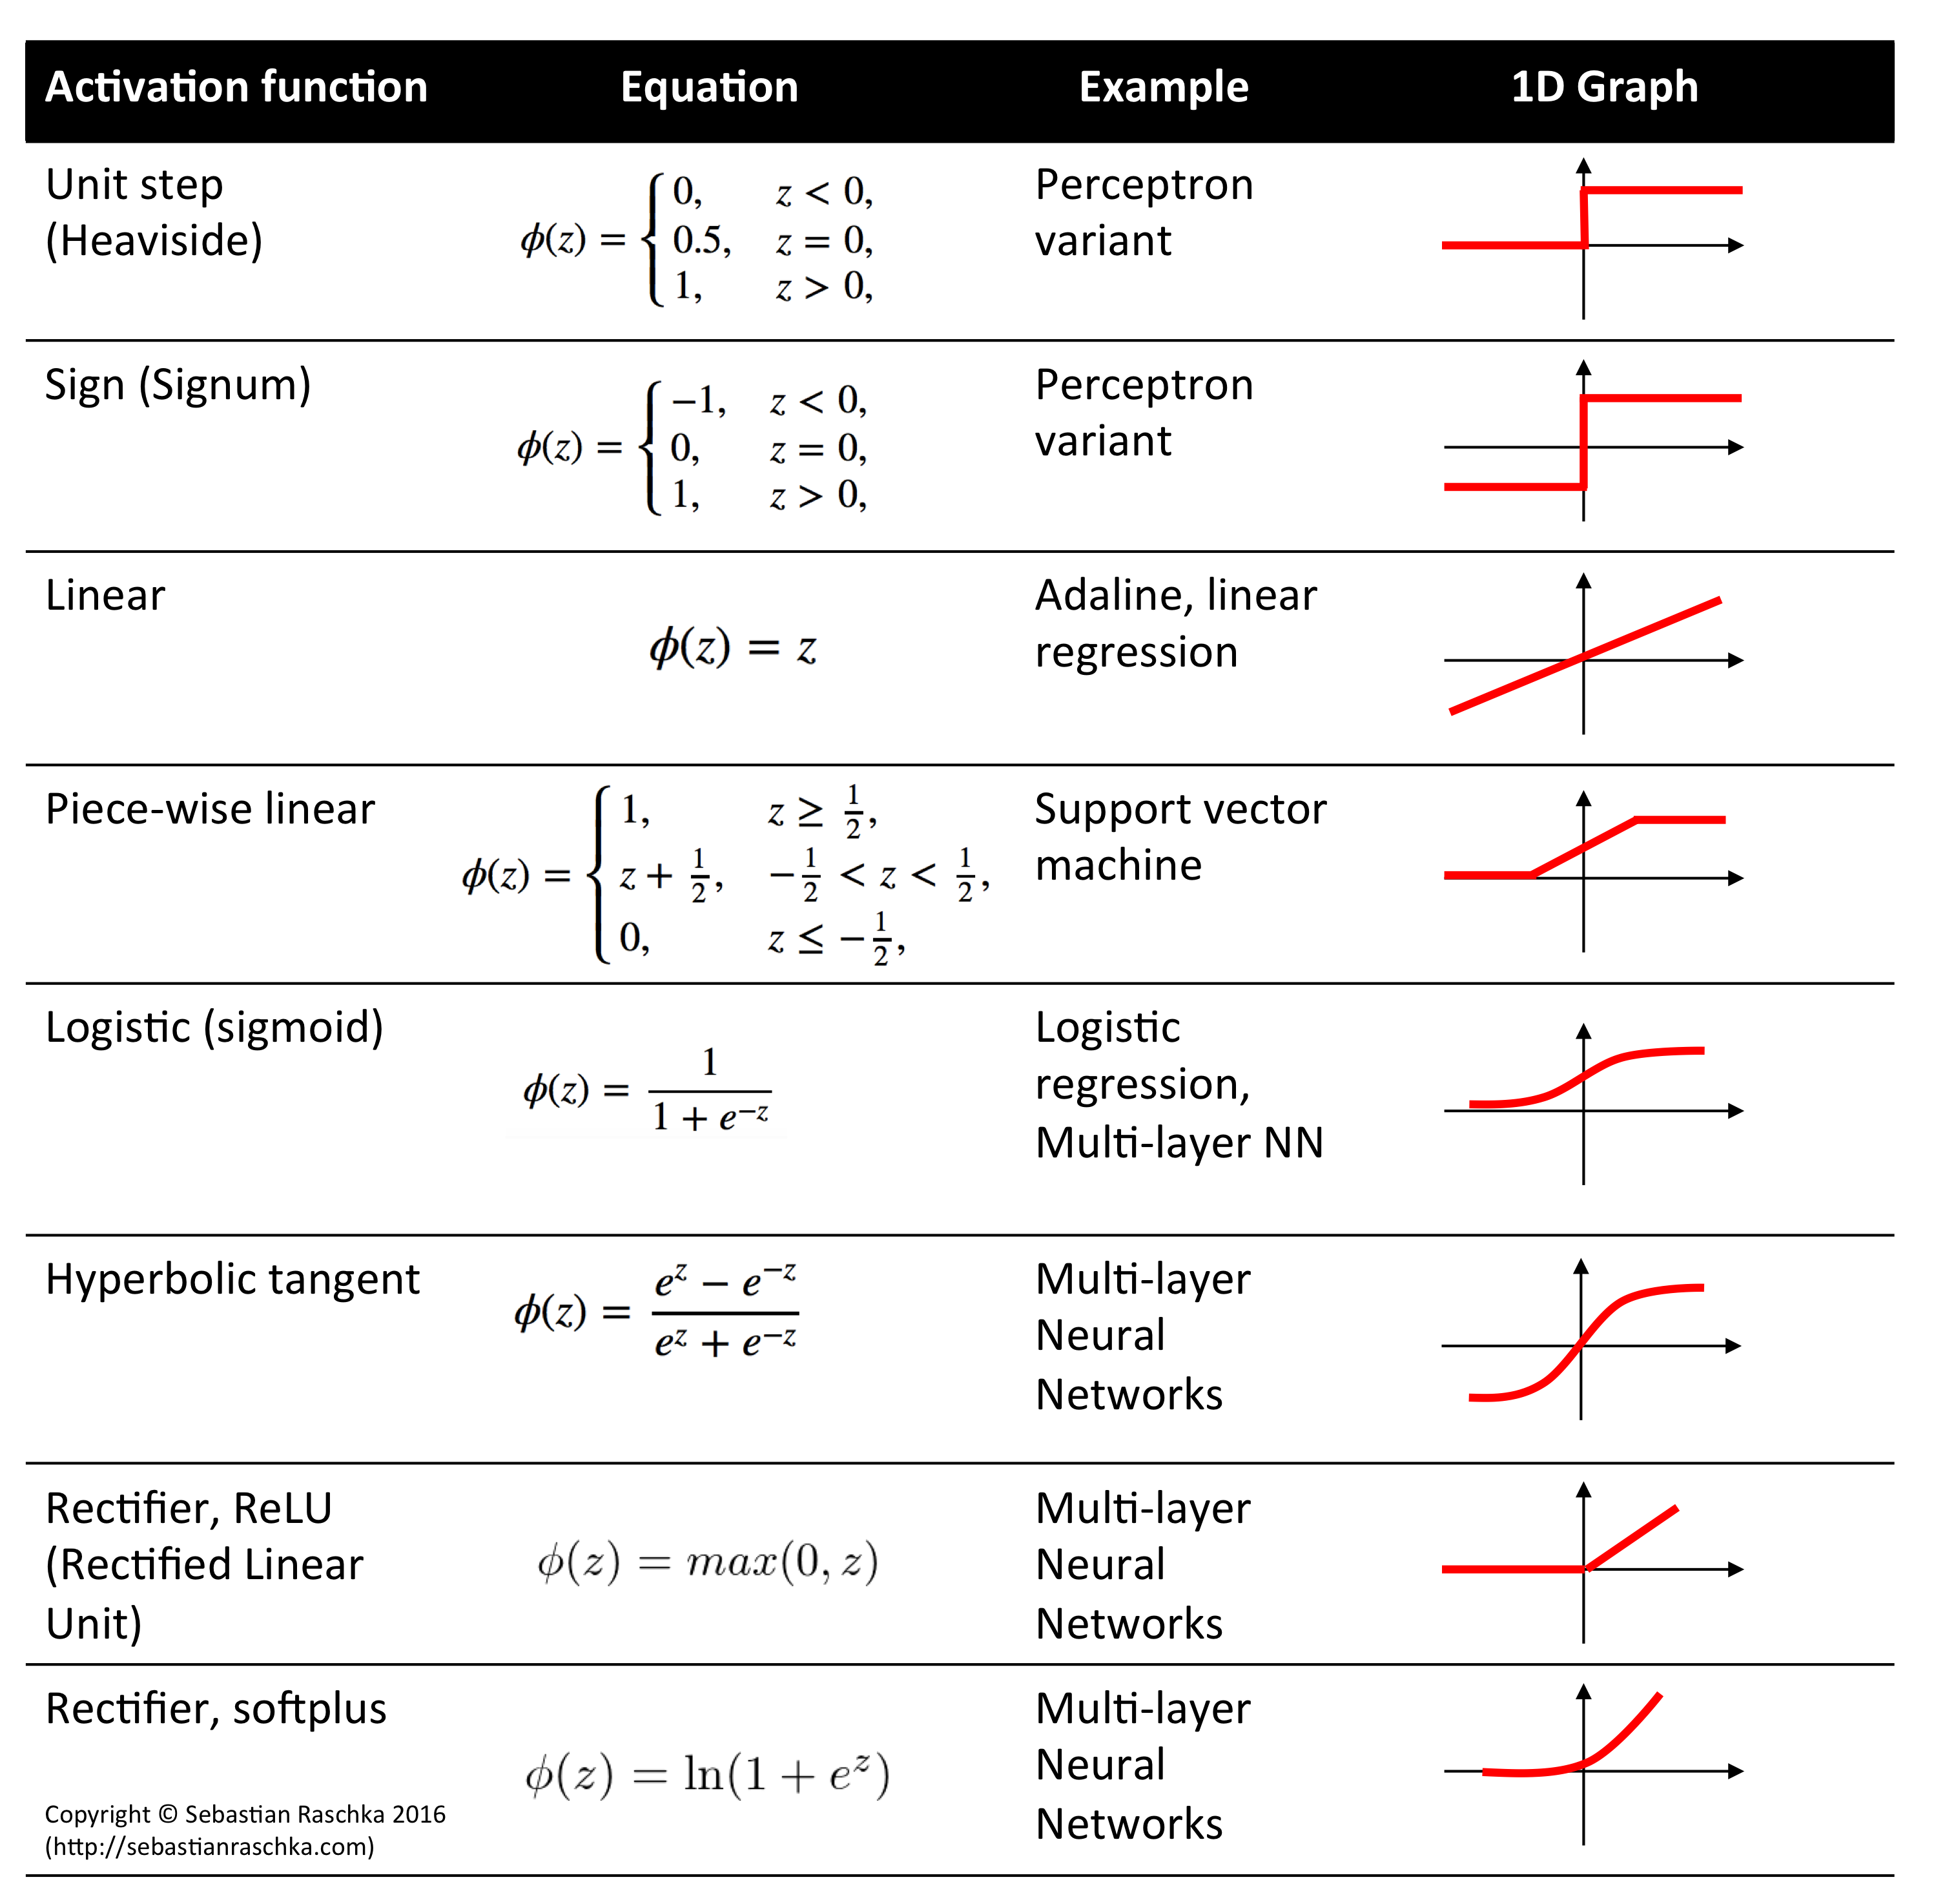
[2]

In [72]:
# pip install nnfs package
'''
import sys
!{sys.executable} -m pip install nnfs
import nnfs

nnfs.init()
'''

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons) #randn produces a gaussian distribution centred around zero
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
class Activation_ReLU: #rectified linear unit
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
        
        
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output=[]

for i in inputs:
    if i > 0:
        output.append(i)
    elif i <= 0:
        output.append(0)
    
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


Here we will now create a spiral dataset for us to use in the neural network.

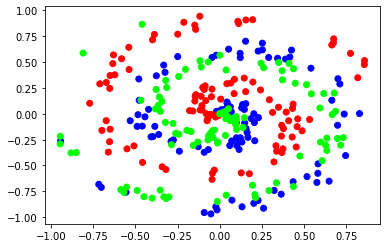

In [73]:
import matplotlib.pyplot as plt

# a spiral data set:
def spiral_data(points, classes): 
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = spiral_data(100,3) # 3 classes of 100 feature sets each
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show()

### Softmax Activation
Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

The most common use of the softmax function in applied machine learning is in its use as an activation function in a neural network model. Specifically, the network is configured to output N values, one for each class in the classification task, and the softmax function is used to normalize the outputs, converting them from weighted sum values into probabilities that sum to one. Each value in the output of the softmax function is interpreted as the probability of membership for each class.
[3]

First step in training a model is determining how wrong the model is. which of the following is more correct?

In [74]:
layer_outputs = [4.8,1.21,2.385]

layer_outputs = [4.8,4.79,4.25]

We compare them relatively to other neurons but like the rectified linear activation function it is exclusive per neuron. They are'nt really connected so there is no relative comparison that can be fairly made. Next problem is that these are unbounded so relative closeness can vary.

If we use a probability distribution and keep a rectified linear activation function, any negative values will be clipped to zero as such we will lose information. The network cannot learn how right or wrong something is as if the value was -20 0r -300000 we lost the meaning of it when it was clipped. So what do we do with the negative values? we use exponents to keep the values positive and on a learnable scale.


In [75]:
import math
E = math.e
exp_values = np.exp(layer_outputs)
'''
or can run:
for output in layer_outputs:
    exp_values.append(E**output)
'''

print(exp_values)
norm_base = sum(exp_values)
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print(sum(norm_values))

[121.51041752 120.30136866  70.10541235]
1.0


 Input -> Exponentiate -> Normalize -> Output
 
         Now goes to:

 Input -> Softmax -> Output

In [76]:
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]
#we want to iterate over this 2D matrix and sum the rows
exp_values = np.exp(layer_outputs)

print(np.sum(layer_outputs, axis=1, keepdims=True)) 
#axis=0 is sum of columns,1 is rows
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print(norm_values)

[[8.395]
 [7.29 ]
 [2.487]]
[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


#### Overflow Prevention
It is very easy for exponents to reach an overflow limit when inputting large values. To prevent this overflow we take the values in this output layer prior to exponentiation and subtract the largest value in that layer from all of the values in that layer. Now largest value is zero and every othe value is negative meaning we only get an output between 1 and zero.

v=u-maxu

In [85]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
X, y = spiral_data(points=100, classes=3)
dense1 = Layer_Dense(2,3) #2 input features as X, y
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])
#everything was initialised randomly so prediction distribution 
#should be 1/3 for this

[[0.33333333 0.33333333 0.33333333]
 [0.33332847 0.33335564 0.33331589]
 [0.33332721 0.33336952 0.33330327]
 [0.33332474 0.33338411 0.33329115]
 [0.33320692 0.33367649 0.33311659]]


#### Calculating Loss
When taking mean absolute error we are just taking the average of the distance of various points of prediction versus the target values. Closer to target values you get the lower the error. From our softmax activation function our output is a probability distribution.

Loss function for classification is categorical cross entropy.
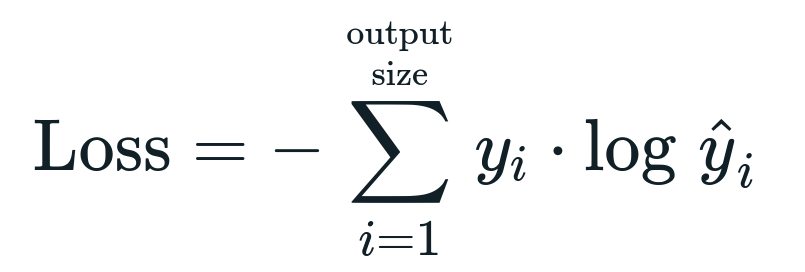
[4]

#### One-hot Encoding
Have a vector that is n classes long filled with zero's apart from a 1 at the target index.
Example:

-Class:5

-Label:2

-Vector=[0,0,1,0,0]

When we calculate CCE with One-hot vector, it allows us to simplify things to being just the negative log of the predicted target class.

In [86]:
#CCE Solution

import math
softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]
# target_class = 0
loss = -(math.log(softmax_output[0])*target_output[0]+
         math.log(softmax_output[1])*target_output[1]+#value zeros out
         math.log(softmax_output[2])*target_output[2])#value zeros out
print(loss)
#same as doing:
loss=-math.log(softmax_output[0])
print(loss)
#obtain same result
'''
x = np.linspace(-1, 2, 100)
y = np.exp(x)
y2 = np.exp(-x)
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('exp(-x)')
'''

0.35667494393873245
0.35667494393873245


"\nx = np.linspace(-1, 2, 100)\ny = np.exp(x)\ny2 = np.exp(-x)\nplt.figure()\nplt.plot(x, y)\nplt.xlabel('x')\nplt.ylabel('exp(x)')\nplt.plot(x, y2)\nplt.xlabel('x')\nplt.ylabel('exp(-x)')\n"

### Implementing Loss
#### Cross Entropy 
Cross entropy loss is a metric used to measure how well a classification model in machine learning performs. The loss (or error) is measured as a number between 0 and 1, with 0 being a perfect model. The goal is generally to get your model as close to 0 as possible.

In [87]:
import numpy as np
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
print(softmax_outputs[[0,1,2],class_targets])

[0.7 0.5 0.9]


In [88]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    
loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)
print('Loss:', loss)

Loss: 1.0991746975067045


#### Optimization and Derivatives
Further optimization of this stage can be done with Bayesian optimization:
https://machinelearningmastery.com/what-is-bayesian-optimization/

#### Sources

1 - https://www.investopedia.com/terms/n/neuralnetwork.asp#:~:text=A%20neural%20network%20is%20a,organic%20or%20artificial%20in%20nature.

2 - https://sebastianraschka.com/faq/docs/activation-functions.html

3 - https://machinelearningmastery.com/softmax-activation-function-with-python/

4 - https://androidkt.com/wp-content/uploads/2021/05/Selection_098.png